<a href="https://colab.research.google.com/github/BrianChegeGichau/nairobihospital/blob/master/Week8Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

# Understanding the Context

Nairobi Hospital is one of Kenya's top hospital which has superb clinical affiliates and a global outlook. Its personalized health care and their expertise in the medical world provide exceptional health care experience. I will conduct my analysis using state of the art algorithms and achieve the world class standards achieved by Nairobi Hospital. 

The Hospital conducted a clinical camp to test for hypothroidism. Hypothroidism(underactive thyroid) is a condition in which the thyroid gland does not produce enough of certain crucial hormones. The thyroid gland is a butterfly-shaped endocrine gland that is normally located in the lower front of the neck. The thyroid's job is to make thyroid hormones which are secreted into the blood and then carried to every tissue in the body. The thyroid hormone helps the body use energy, stay warm and keep the brain, heart muscles and other organs working as they should. Over time untreated hypothroidism can cause a number of health problems such as obesity, joint pain, infertility and even heart disease and even heart diseases which is the second leading cause of deaths all over the world. The disease is caused by a variety of possibilities like genetics and nutrition. But by a better nutrition like more vegetables and less of animal products the possibility of hypothroidism could be controlled.

# Specifying the Question

I was provided with 18 variables that contain patient's symptoms and identify whether a patient has hypothroidism or not.

I will use two approaches for my analysis to identify the problem at hand. These are my approaches:


1.   **Decision Trees**: The following are what I will apply in my analysis: 

  Set up hyperparameters.
  Do feature importance.

2. **Support Vector Machine**: I will apply three kernel functions which are:
  Polynomial,
  Linear,
  Radial Basis function as a basis of building my Support Vector Machine learning models from which I will evaluate performance and pick the kernel that performs best.


# Metric for Success

The following are what I'll put as accountability to ensure success in my analysis.

1.   Fit my models in the afore mentioned models and obtain appropriate metrics for measuring their peformance.
2.   Find the symptoms that predispose an individual to hypothroidism
3.   Get comprehensive evaluations, conclusion and a recommendation for my models. 



# The Experimental Design

The following steps will be undertaken during this study:

1.   Reading and exploring the dataset.
2.   Data Cleaning; Dealing with outliers, anomalies and missing data to answer the given question.
3.   Perform univariate, bivariate analysis and multi-variate analysis and recording observations.
4.   Checking for multi-collinearity.
5.   Fitting my data into the decision trees models and support vector machine models.
6.   Providing comprehensive recommendations based on my study.
7.   Challenging my solution by providing insights on how to make model improvements.



# 2. Reading and exploring the dataset

In [1]:
#Importing the necessary dataset for reading the dataset
import pandas as pd

In [21]:
#Reading the dataset and previewing the first few rows.
df = pd.read_csv('hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#Previewing the last few rows of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#Getting to know the datatypes of our variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
#Basic statistics of the data
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


Understanding the variables in the dataset:


*   Status : This columns shows whether one has hypothroidism or not.
*   Age    : The column contains the age of the patients
*   Sex    : The column contains the gender of the patients
*   On_thyroxine  : This column contains whether a patient is on Levythyroxine which is a medication that provides thyroid hormone.
*   Query_on_thyroxine  :  The column contains whether one has queried on thyroxine.
*   On_antithyroid_medication : The column contains information that inquires whether one is on anti-thyroid medication.
*   Thyroid_surgery  : The column contains information of whether a patient went for a thyroid surgery or not.
*   Query_hypothyroid  : Whether the patient has inquired on overactive thyroid glands.
*   Query_hyperthyroid  : Whether the patient has inquired on underactive glands.
*   Pregnant : Whether the patients is pregnant or not.
*   Sick  : Whether the patient is sick or not.
*   Tumor : Whether the patient has a tumor or not.
*   Lithium  : Whether the patient has lithium or not.
*   Goitre  : Whether the patient has Goitre or not.
*   TSH_measured  : Whether the patient was measured the TSH test.
*   TSH     : Thyroid Stimulating Hormone Levels
*   T3_measured  : Contains whether the patient underwent the T3 test
*   T3    :  Contains the levels of Triiodothyronine levels in the body.
*   TT4_measured   : Contains information of whether the patient underwent the TT4 test.
*   TT4  : Contains the blood level of the thyroxine hormone.
*   T4U_measured  :  Contains information of whether the patient underwent the T4U test.
*   T4U  :  Contains levels of thyroxine in the blood.
*   FTI_measured  :  Contains information of whether the patient has their FTI index calculated.
*   FTI   :  The Free thyroxine index. 
*   TBG_measured  : Contains information of whether one had gone for the TBG test or not.
*   TBG  :  Measures the level of protein that moves thyroid hormone throughout the body.

# 2. Data Cleaning

I found some columns with ? that I assumed the individual collecting the data meant that those were missing values. I decided to fill those values with a NaN value meaning its a missing value.

In [3]:
#Replacing values with a ? with a missing value.
import numpy as np
df.replace('?', np.nan, inplace=True)

In [4]:
#Finding out the missing values with a missing value.
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [4]:
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'TBG','FTI']

# Categorical columns list
cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',\
            't4u_measured', 'fti_measured', 'tbg_measured']

# Boolean columns list
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True or False value
#
for column in bool_cols:
  df[column] = df[column].replace('f', 0)
  df[column] = df[column].replace('t', 1)
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in df.columns:
  if column in num_cols:
    df[column] = df[column].astype('float')
  elif column in cat_cols:
    df[column] = df[column].astype('category')
  elif column in bool_cols:
    df[column] = df[column].astype('int')
  
# Previewing the column datatypes to check whether the changes have been effected
#
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                    int64
query_on_thyroxine              int64
on_antithyroid_medication       int64
thyroid_surgery                 int64
query_hypothyroid               int64
query_hyperthyroid              int64
pregnant                        int64
sick                            int64
tumor                           int64
lithium                         int64
goitre                          int64
TSH_measured                   object
TSH                           float64
T3_measured                    object
T3                            float64
TT4_measured                   object
TT4                           float64
T4U_measured                   object
T4U                           float64
FTI_measured                   object
FTI                           float64
TBG_measured                   object
TBG                           float64
dtype: objec

I decided to find out the reason for the missing values in specific columns that had values.

In [ ]:
#Printing out the variables that showed the individual had not gone for the T3 test
df[df['T3_measured'] == 'n']

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
8,hypothyroid,20.0,F,0,0,0,0,1,0,0,0,0,0,0,y,92,n,NaN,y,39,y,1.21,y,32,n,NaN
9,hypothyroid,42.0,F,0,0,0,0,0,0,0,0,0,0,0,y,48,n,NaN,y,7.60,y,1.02,y,7.50,n,NaN
16,hypothyroid,50.0,F,1,0,0,1,0,0,0,0,0,0,0,y,61,n,NaN,y,13,y,1.18,y,11,n,NaN
20,hypothyroid,43.0,M,0,0,0,0,1,0,0,0,0,0,0,y,216,n,NaN,y,4,y,1.28,y,0,n,NaN
32,hypothyroid,50.0,F,1,0,0,0,0,0,0,0,0,0,0,y,34,n,NaN,y,55,y,0.93,y,60,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,negative,28.0,F,0,0,1,0,0,0,0,0,0,0,0,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,39
3139,negative,77.0,F,1,0,0,0,0,0,0,0,0,0,0,y,0,n,NaN,y,163,y,0.81,y,202,n,NaN
3142,negative,52.0,F,1,0,0,0,0,0,0,0,0,0,0,y,0,n,NaN,y,133,y,1.02,y,130,n,NaN
3150,negative,15.0,M,0,0,0,0,0,1,0,0,0,0,0,n,NaN,n,NaN,y,188,y,0.73,y,258,n,NaN


I found that those who had not gone for the test were the reason for the missing value in the T3 test. 

In [ ]:
#Printing out the variables that showed the individual had not gone for the TSH test
df[df['TSH_measured'] == 'n']

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
55,hypothyroid,41.0,F,0,0,0,0,0,0,0,0,0,0,0,n,NaN,n,NaN,y,44,y,0.90,y,49,n,NaN
152,negative,72.0,M,0,0,0,0,0,0,0,0,0,0,0,n,NaN,y,1,y,83,y,0.95,y,87,n,NaN
166,negative,60.0,M,1,0,0,0,0,0,0,0,0,0,0,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,0
170,negative,22.0,F,0,0,0,0,0,1,0,0,0,0,0,n,NaN,y,1.70,y,82,y,0.72,y,114,n,NaN
179,negative,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,n,NaN,n,NaN,y,260,y,0.31,y,839,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,negative,40.0,F,0,0,0,0,0,1,0,0,0,0,0,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,29
3135,negative,23.0,F,1,0,0,0,1,0,0,0,0,0,0,n,NaN,n,NaN,y,171,y,1.29,y,133,n,NaN
3136,negative,28.0,F,0,0,1,0,0,0,0,0,0,0,0,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,39
3150,negative,15.0,M,0,0,0,0,0,1,0,0,0,0,0,n,NaN,n,NaN,y,188,y,0.73,y,258,n,NaN


I decided to find out the specific number of patients who had test positive hypothroid and had not gone for the specific tests.

In [ ]:
#Printing out the variables that showed the individual had not gone for the TSH test
new = df[df['TSH_measured'] == 'n']

In [ ]:
mf = new.groupby('status').count()
mf

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,,,,,,,,,,,,,,,,,,,,,,,,,
hypothyroid,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
negative,425,455,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467


I found that the patients who had not gone for the TSH test and tested positive was only one person. This means that we are going to fill it with a 0 value  and makes sense since there is a high chance those who had tested positive for the tests were likely to test positive for hypothyroid.

In [ ]:
#Printing out the variables that showed the individual had not gone for the T3 test
new = df[df['T3_measured'] == 'n']

In [ ]:
mf = new.groupby('status').count()
mf

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,,,,,,,,,,,,,,,,,,,,,,,,,
hypothyroid,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
negative,622,669,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681


The same applies to the T3 test. 14 individuals are the ones who tested positive for hypothyroid after not getting a T3 test.

Filling the missing values with a 0.

In [5]:
#Picking the columns of interest for filling with 0 values.
df[['TSH','T3','T4U','TBG','TT4','FTI']] = df[['TSH','T3','T4U','TBG','TT4','FTI']].fillna(0)

In [6]:
#Checking for null values in my dataset.
df.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
T4U_measured                   0
T4U                            0
FTI_measured                   0
FTI                            0
TBG_measured                   0
TBG                            0
dtype: int64

I decided to drop the columns that had missing rows that had missing ages and sexes.

In [6]:
#Dropping columns that had missing values.
df = df.dropna()
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [7]:
#Finding out the shape of our dataset.
df.shape

(2700, 26)

In [ ]:
#Finding if there are any dupliactes in our dataset
df.duplicated().any()

True

In [ ]:
#Previewing the columns that were duplicated.
df[df.duplicated()]
#I decided not to drop the duplicated rows since they did not look duplicated as such.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69.0,F,0,0,0,0,0,0,0,0,0,0,0,y,21,y,0.80,y,53,y,0.86,y,61,n,0
66,hypothyroid,62.0,M,0,0,0,0,0,0,0,0,0,0,0,y,100,y,0.40,y,10,y,1,y,10,n,0
124,hypothyroid,77.0,F,0,0,0,0,0,0,0,0,0,0,0,y,23,y,0.50,y,33,y,0.67,y,49,n,0
128,hypothyroid,79.0,F,0,0,0,0,0,0,0,0,0,0,0,y,29,y,1.60,y,47,y,0.97,y,48,n,0
131,hypothyroid,50.0,F,1,0,0,0,0,0,0,0,0,0,0,y,34,n,0,y,55,y,0.93,y,60,n,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28.0,M,0,0,0,0,0,0,0,0,0,0,0,y,1,y,3.10,y,107,y,1.05,y,103,n,0
3055,negative,33.0,F,0,0,0,0,0,0,0,0,0,0,0,n,0,y,0.80,y,88,y,1.02,y,86,n,0
3066,negative,74.0,F,1,0,0,0,0,0,0,0,0,0,0,y,21,y,1.80,y,126,y,1.18,y,107,n,0
3111,negative,89.0,M,0,0,0,0,0,0,0,0,0,0,0,y,1.30,y,0.90,y,82,y,0.80,y,103,n,0


Checking for outliers.

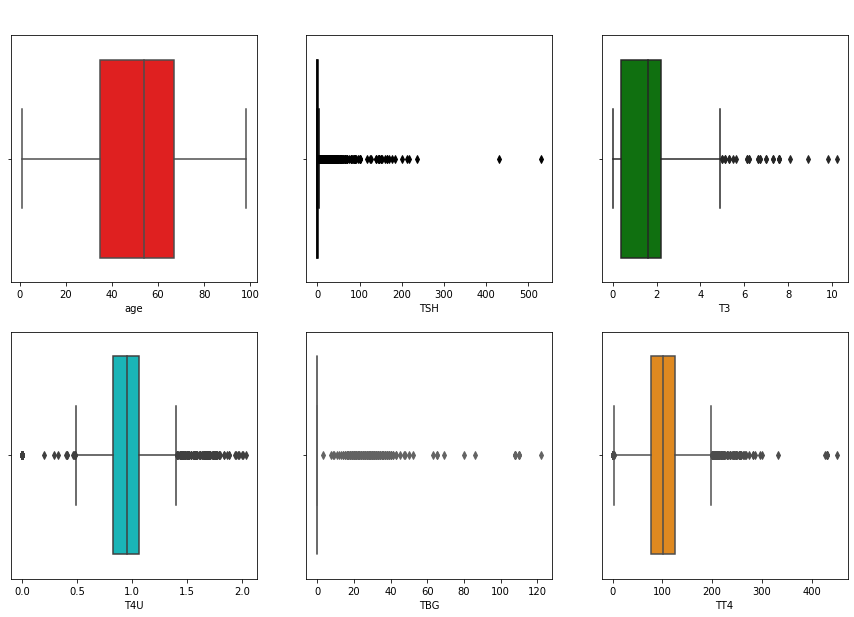

In [ ]:
#Checking for outliers
#Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Defining the columns to check for outliers.
cols = ['age','TSH','T3','T4U','TBG','TT4']
#Defining the colors to be used in the boxplots
colors = ['red','black','green','darkturquoise','mediumpurple','darkorange','fuchsia','blueviolet']
#Used a for loop to plot boxplots for each of the selected columns.
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),df,cols,colors):
  sns.boxplot(df[column], ax=ax, color=color)
  ax.set_facecolor('white')

From the above box plots I can make the following observations:


*   The age columns has no outliers
*   All the tests had outliers but for the T4U column had the most outliers compared to the rest. Followed by the TSH and the TT4 as well.

Since the tests might help us quantify the extreme symptoms that cause hypothroidism, I will not be dropping the outliers.


# Data Exploration

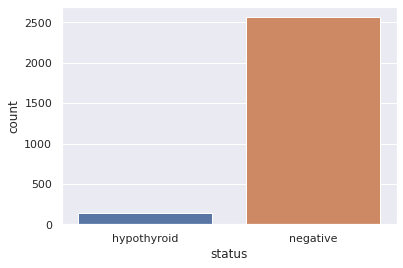

In [ ]:
#Graphing the level of hypothroid in the patients under study
import seaborn as sns
sns.set(style="darkgrid")
#titanic = sns.load_dataset("df")
ax = sns.countplot(x="status", data=df)

This shows that most of the patients tested were negative of the condition while a very minimal number tested positive.

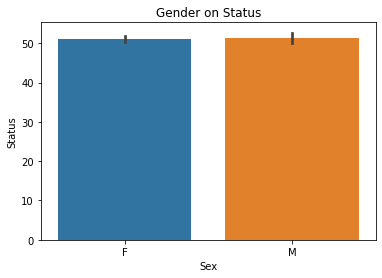

In [ ]:
#Finding the age of both sexes that tested positive
import seaborn as sns
import matplotlib.pyplot as plt

df_1 = df.groupby('status').count()
df_1 = df_1.reset_index(inplace=True)

sns.barplot(x=df['sex'], y=df['age'], data=df_1)
plt.xlabel('Sex')
plt.ylabel('Status')
plt.title('Gender on Status')
plt.show()

This shows that the mean age of hypothroid patients for both genders were the same.

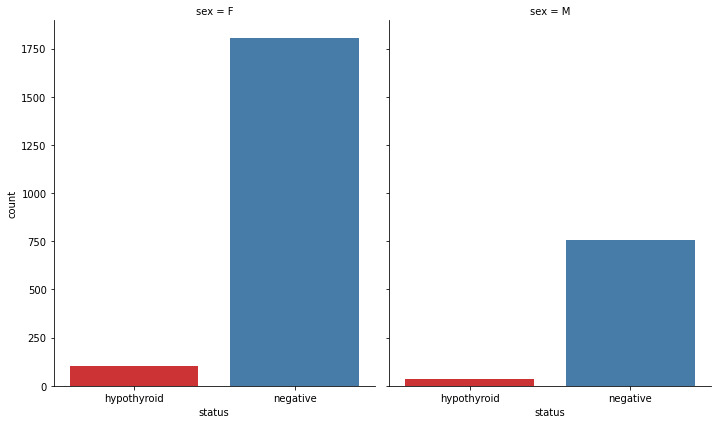

In [ ]:
#Finding out the number of patients for both genders
sns.catplot("status", col="sex", col_wrap=4, data=df, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

There are a number of things the graph above tells us:

*   That most of the patients tested were females
*   This is attributes to the fact that most females also tested positive for the disease.

**NB**:This however does not claim women are more prone to the disease. Both gender are prone to the disease.

<Figure size 480x320 with 0 Axes>

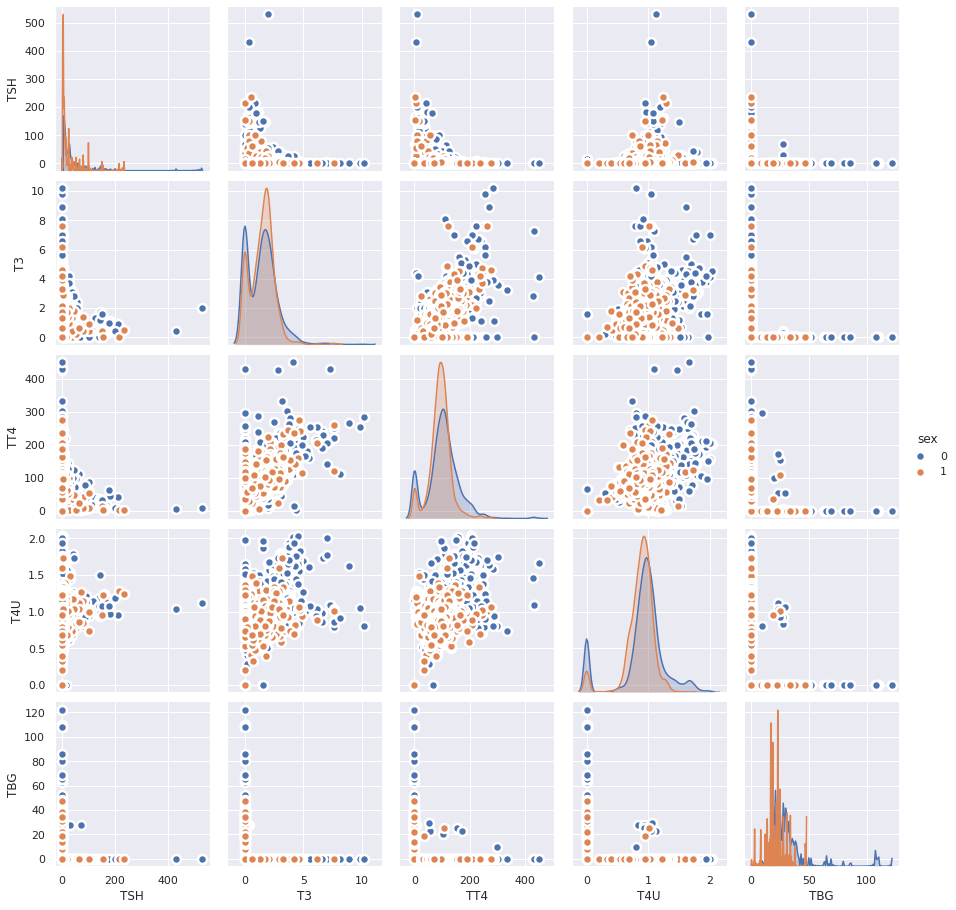

In [ ]:
plt.figure(dpi= 80)
sns.pairplot(df[['TSH', 'T3', 'TT4', 'T4U', 'TBG', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

I found that that two pairs of tests are highly correlated. Which are the :


*   T3 test and TT4 test.
*   TT4 test and T4U test.



**Distributions**

I also needed to find out the distributions of the ages am working with.

In [ ]:
#Creating two dataframes that contain the male and female only and their respective ages.
male = df.loc[df.sex=='M', 'age']
female = df.loc[df.sex=='F', 'age'] 

In [ ]:
# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

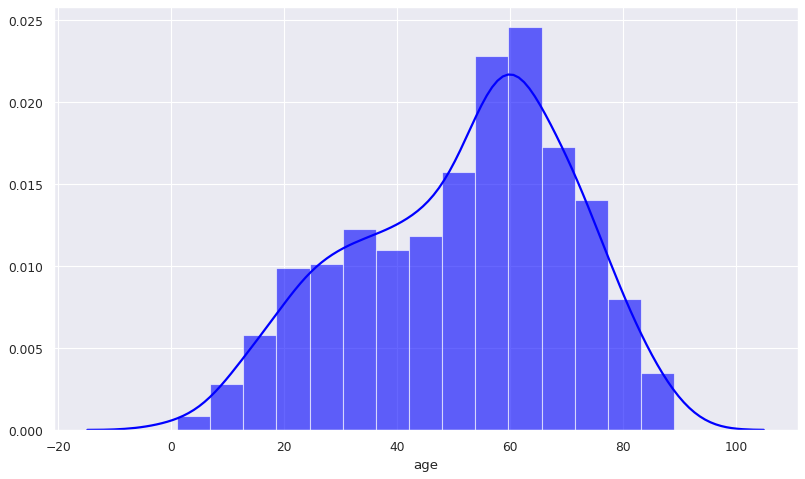

In [ ]:
#Plotting the distributions of the male ages.
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="blue", label="Male", **kwargs)

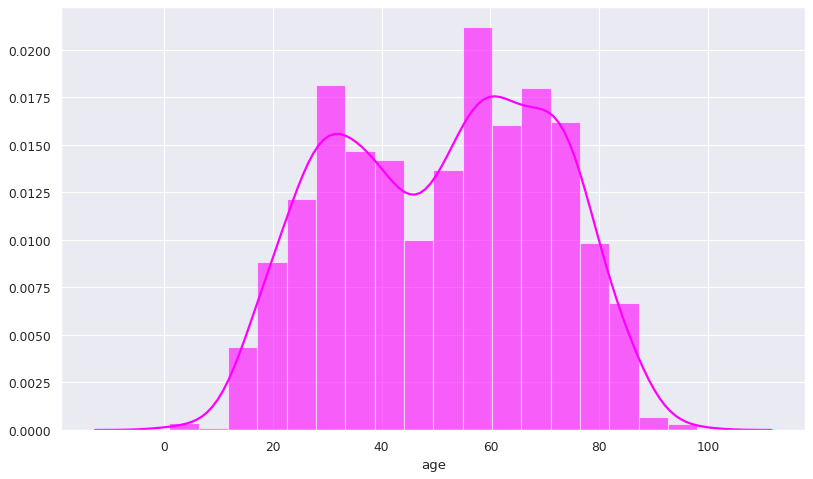

In [ ]:
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(female, color="fuchsia", label="Female", **kwargs)

Key take aways for the distributions:


*   The males ages seem to assume a left-skewed distribution with the peak seeming to take toll at around 60 years of age.
*   The female ages seem to take a fairly bi-modal distribution with the highest peak at around 60 years of age.

Most of our patients seem to be of 60 years of age.

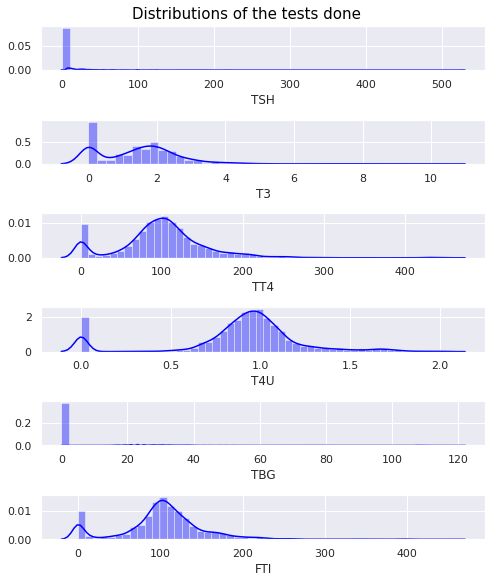

In [ ]:
columns = ['TSH','T3','TT4','T4U','TBG','FTI']
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (7, 8))
fig.suptitle('Distributions of the tests done', y= 1.01, color = 'black', fontsize = 15)

for ax, data, col in zip(axes.flatten(), df, columns):
  sns.distplot(df[col], ax = ax, kde = True, color = 'blue')
plt.tight_layout()

Key takeways from the above distribution plots:


*   Most of the patients seem not to have taken the TSH test hence no distribution was formed.
*   The T3 test had a bi-modal distribution with two peaks.
*   The TT4 test also had a bi-modal distribution with most patients having taken the test.
*   The T4U test had a bi-modal distribution with most patients having taken the test.
*   The TBG test had most patients having not taken the test hence no distribution was formed.
*   The FTI test had a bi-modal distribution with most patients having taken the test.

This will be very informative in our modelling.



# Baseline Model

I decided to drop the columns that gae us information whether one had gone for a particular test or not. The values on the test will give us that information since I filled the missing values with 0 to represent the individuals that had not gone for the particular tests.

In [7]:
#Dropping the columns that told us whether one had gone for a particular test or not.
df = df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured','FTI_measured', 'TBG_measured'],axis=1)

In [8]:
#Getting the dummy variables for the boolean columns in our dataset
df = pd.get_dummies(df, drop_first=True)

In [9]:
#Rename the columns to their right format
df = df.rename(columns = {'sex_M' : 'sex','status_negative' : 'status'})

In [11]:
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG,status,sex
0,72.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,0.0,0,1
1,15.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,0.0,0,0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,0.0,0,1
3,24.0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,0.0,0,0
4,77.0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,0.0,0,1


In [67]:
#Since it was a classification problem I decided to use LogisticRegression for baseline model.
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
X = df.drop(['status'],axis=1)
y = df['status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [68]:
#Fitting my Logistic Regression on the train data
regression.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
#Predicting the values based on the Logistic Regression
y_predict = regression.predict(X_test)

Root Mean Squared Error is the square root of the variance of the residuals. It indicates the absolute fit of the model of the data, how close the observed data points are to the model's predicted values. It can be interpreted as the standard deviation of the unexplained variance. 

In [70]:
#Finding the RMSE of our model to form as a guideline for our model.
from sklearn import metrics
import numpy as np

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Root Mean Squared Error: 0.13098420799889596


RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. 

Therefore our baseline Logistic model has really low RMSE value of 0.131 meaning our baseline model is a generally a good fit. We will challenge it and find ways to improve our RMSE score through different Machine Learning Classification Algorithms.

**Multivariate Analysis**

This is normally based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcomes variables at a time. Multi-variate analysis enables:

1. The exploration of data structures and patterns.
2. Probability computations of multi-dimensional regions.
3. The study and measurement of relationships.
4. Normal and general multivariate models and distribution theory.
There are three multivariate techniques namely : Principal Component Analysis, Factor Analysis and Linear Discriminant Analysis.

Linear Discriminant Analysis is a linear transformation technique while the Principal Component Analysis is an unsupervised linear transformation technique since it ignores class labels.

We are doing the Supervised Learning Algorithm therefore I will perform the Linear Discriminant Analysis.

In [18]:
# dividing dataset into feature set and corresponding labels
X = df.drop(['status'],1)
y = df['status']

# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# applying Principle Component Analyis
# importing pca
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

,0
TT4,3.249222
on_antithyroid_medication,0.221041
sick,0.157368
lithium,0.123117
tumor,0.121521
pregnant,0.107628
query_on_thyroxine,0.092464
sex,0.069915
T3,0.030737
TBG,-0.071080


After my Linear Discriminant Analysis I found that the following factors affect more in determining whether one has hypothroidism or not:


*   TT4 Levels
*   Whether the patient was on antithyroid medication.
*   Whether the individual was sick.
*   The levels of lithium in the patient.
*   Whether the individual had a tumor or not.
*   Whether the patient was pregnant.


The following factors affected least on whether one would have hypothroidism or not:

*   TSH Levels
*   T4U Levels
*   FTI Levels'
*   Whether the individual queried on hyperthyroid.
*   The age of the individual. Meaning age doesn't matter on whether an individual is likely to get hypothroidism despite our mean ages being above 50.
*   Whether the individual underwent a thyroid surgery.



# Checking for Multi-Collinearity

The key goal of regression analysis is to isolate the relationship between each independent variables and the independent variable. The coefficient estimates can swing wildly based on which other independent variables are in the model. Multi-collinearity reduces the precision of the estimate co-efficients which weakens the statistical power of the regression model and that is why it is important for us to remove the multicollinear variables to be able to build an efficient model.

In [ ]:
columns_of_interest = df[['TSH','T3','TBG','TT4','T4U','sex','age']]

In [ ]:
#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG,status,sex
age,1.000000,-0.000534,-0.022115,-0.064238,-0.013877,0.052978,-0.090880,-0.165790,0.071169,-0.066219,-0.021472,-0.039377,0.012675,-0.085210,-0.007518,-0.032559,0.097829,-0.139719,-0.036686,0.007421
on_thyroxine,-0.000534,1.000000,-0.033632,-0.023931,0.026740,0.068601,-0.100378,-0.002446,-0.067712,-0.024992,-0.011817,-0.031211,-0.006492,-0.096023,0.223071,0.087017,0.202547,-0.062459,0.044320,-0.139011
query_on_thyroxine,-0.022115,-0.033632,1.000000,-0.015304,0.023384,-0.017294,-0.039405,-0.019678,-0.024023,0.058335,-0.003584,0.006824,-0.026915,-0.064694,0.006333,0.005325,0.028938,-0.033576,0.030321,0.059889
on_antithyroid_medication,-0.064238,-0.023931,-0.015304,1.000000,-0.003598,-0.034020,0.094509,0.004712,-0.021212,-0.013702,-0.003165,-0.021834,-0.001414,0.045114,-0.022250,-0.009830,-0.038664,0.024398,0.012008,-0.046449
thyroid_surgery,-0.013877,0.026740,0.023384,-0.003598,1.000000,0.006889,0.027039,-0.013642,-0.033884,-0.021889,-0.005056,-0.023504,0.014200,0.006958,-0.010940,0.024641,-0.014969,-0.025623,-0.042138,-0.046997
query_hypothyroid,0.052978,0.068601,-0.017294,-0.034020,0.006889,1.000000,-0.022574,-0.015548,-0.053400,-0.034496,0.042533,-0.024672,0.070385,-0.036404,0.018174,0.048021,-0.002339,-0.046053,-0.051960,-0.067626
query_hyperthyroid,-0.090880,-0.100378,-0.039405,0.094509,0.027039,-0.022574,1.000000,0.065927,-0.054615,-0.035281,-0.008149,0.040395,-0.039861,0.138689,0.094192,-0.023581,0.076558,0.067728,0.031947,-0.068247
pregnant,-0.165790,-0.002446,-0.019678,0.004712,-0.013642,-0.015548,0.065927,1.000000,-0.027273,0.004172,-0.004069,0.083638,-0.014056,0.186283,0.154745,0.229582,-0.001501,0.039199,0.022840,-0.096212
sick,0.071169,-0.067712,-0.024023,-0.021212,-0.033884,-0.053400,-0.054615,-0.027273,1.000000,-0.021508,-0.004968,-0.034271,-0.003823,-0.020372,-0.020409,-0.012038,0.001257,-0.025267,0.022845,0.025402
tumor,-0.066219,-0.024992,0.058335,-0.013702,-0.021889,-0.034496,-0.035281,0.004172,-0.021508,1.000000,-0.003209,-0.022139,-0.023458,0.016001,0.001304,0.032164,-0.002302,-0.030061,0.027147,-0.005877


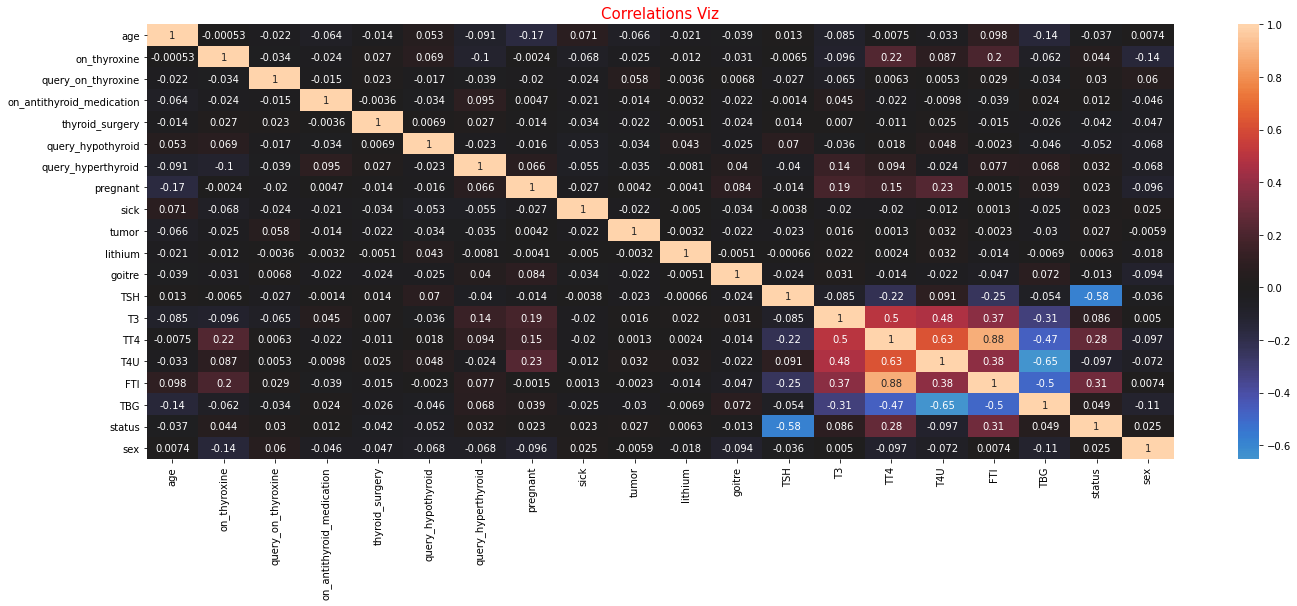

In [ ]:
#Creating a correlogram to visualize the 
plt.figure(figsize = (23, 8))
sns.heatmap(correlations, annot = True, center = 0)
plt.title('Correlations Viz', fontsize = 15, color = 'red')
plt.show()

Key take aways in the above visualization:


*   The T3 and TT4 tests are highly correlated with a 0.5 value.
*   TT4 and T4U tests are also highly correlated with a 0.63 value.

*   The T4U and TBG tests are stronly negative correlated with a -0.63 value.

The Variance Inflation Factor (VIF) is the quotient of the variance in a model with multiple terms by the variance of a model with one term. It quantifies the severity of multi-collinearity in an ordinary least squares least squares regression analysis. It provides an index that measures how much the variance of an estimated regression coefficient is increased based on the collinearity. Generally a VIF Score of more than 4 signals a high multi-collinearity between one predictor and the other predictors in a model. High values signifies a difficulty to assess accurately the contribution of predictors to a model.

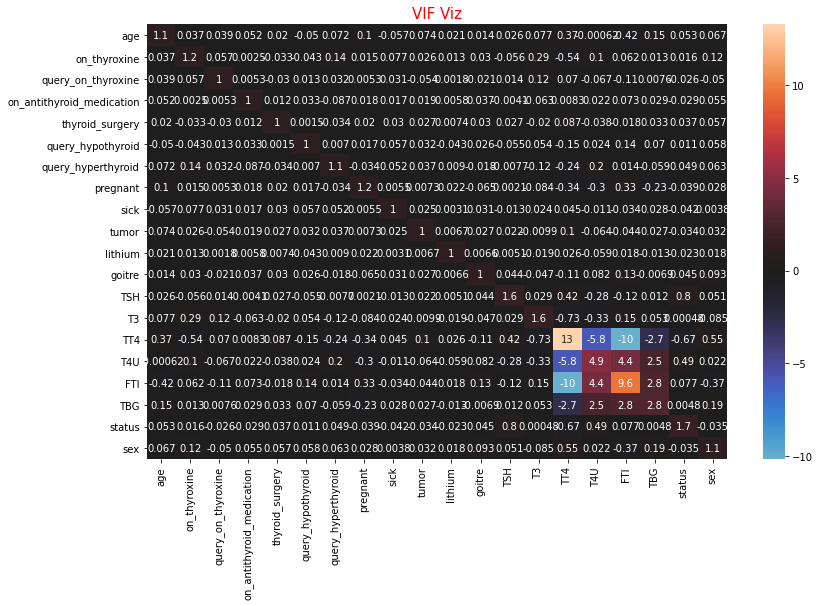

In [ ]:
#Checking the VIF
import matplotlib.pyplot as plt
import seaborn as sns
vif = pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)
plt.figure(figsize = (13, 8))
sns.heatmap(vif, annot = True, center = 0)
plt.title('VIF Viz', fontsize = 15, color = 'red')
plt.show()

I checked for multi-collinearity and found that 4 tests which are the TT4, T4U, DTI, TBG are highly multi-collinear. I decided to keep them around and do feature importance in our random forest models.

# Decision Trees Models

**Random Forests**

Random Forests are an ensemble learning method for classification, regression, and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes(classification) or mean prediction(regression) of the individual trees.

Features of random forests :

*   It can handle thousands of input variables without variable deletion which works with our 2,700 rows data.
*   It gives estimates of what variables are important in the classification.
*   It generates an internal unbiased estimate of the generalization error as the forest building progresses.



Random Forests are non parametric which means that it does not rely on data belonging to any particular parametric family of probability distribution. It can thus be able to handle skewed and multi-modal data which matches with our tests distribution which a number assumed bimodal and multimodal distributions. No formal distribution assumptions are required for this technique.

I decided to use a Decision Tree Classifier as my baseline model for my random forests model.

In [83]:
#Importing the necessary libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
#Defining the predictor and target variables.
X = df.drop(['status'],axis=1)
y = df['status']
#Building my model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

I'll be using the accuracy score as my metric for assessing my model.

In [84]:
#Assessing the perfromance of the model.
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy: 0.9877450980392157
RMSE is: 0.11070186069251191


The model had an accuracy of 98% which means it did a good job of prediction but overfitted. I will do hyperparameter tuning on my random forest models and see whether anything will change. The RMSE is at 0.1107 which is fairly small and our model is generally a good fit.

**Building my Random Forest Classifier model.**

In [85]:
#Fitting our data in a Random Forest model.
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=20,max_depth=5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [86]:
#Predicting using our test values.
y_predict = forest.predict(X_test)

In [87]:
#Printing out the mtrics which is the RMSE and the accuracy
print('Accuracy is:', metrics.accuracy_score(y_test,y_predict))
print('RMSE is: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy is: 0.9901960784313726
RMSE is:  0.09901475429766743


Our model had an accuracy of 99% which meant our model had overfitted. We will do random search the hyperparameters to reduce overfitting of our model. The RMSE is at 0.099 value which means the model was a good fit.

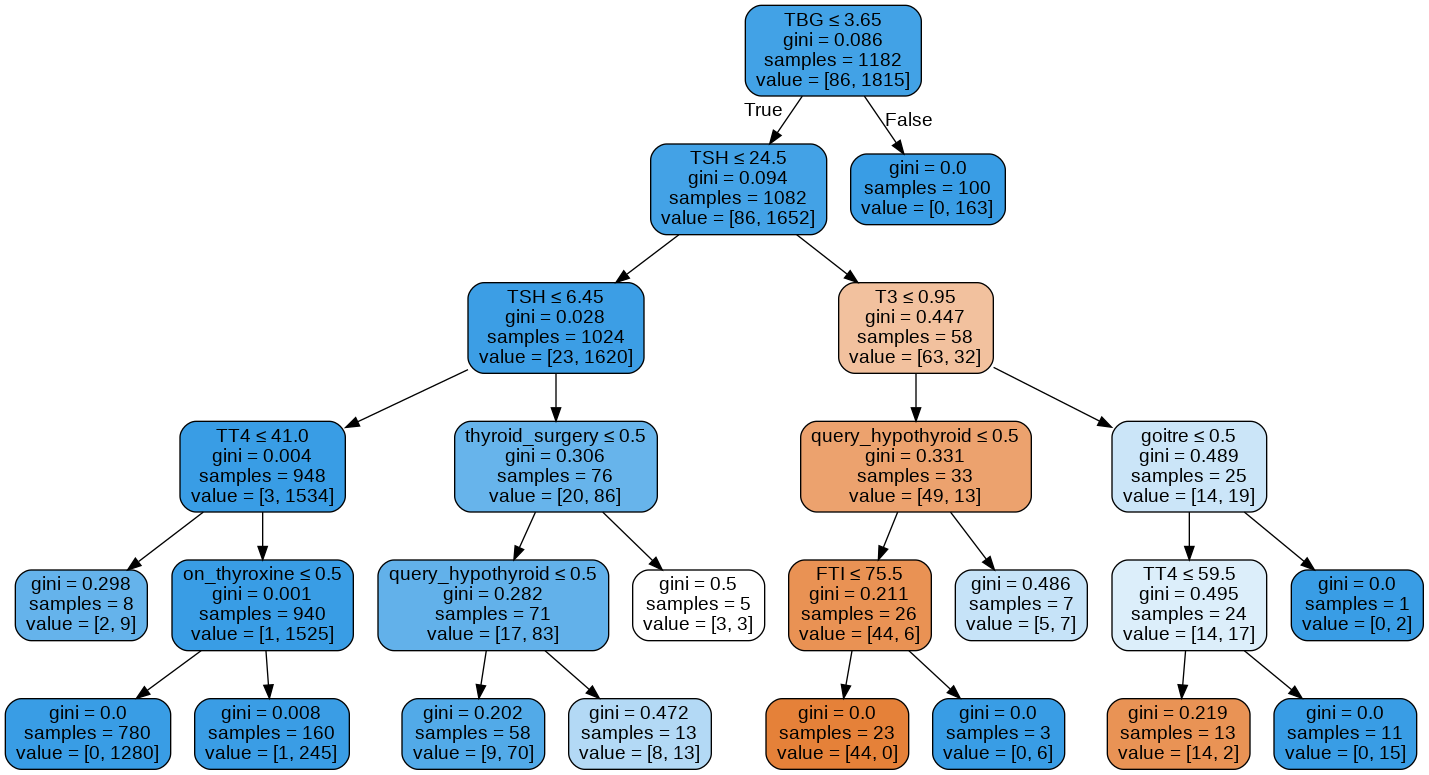

In [33]:
#Visualizing the Decision Tree of our 50th tree in our forest.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
StringIO().write(str((1,2)))
from IPython.display import Image 
import pydotplus

tree = forest.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('Hypothroidism') 
Image(graph.create_png())

**Hyperparameter tuning**

In [36]:
#Defining the hyperparamters 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
#Creating an array for the no of trees between 200 and 2000
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000,num=10)]
#Defining the number of features to consider at every split
max_features = ['auto','sqrt']
#Estimating the number of levels in every tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#Estimating the number of samples required to split at every node
min_samples_split = [2,5,10]
#Estimating the number of samples at each leaf node
min_samples_leaf = [1,2,4]
#Defining the methods of selecting samples for training at each tree
bootstrap = [True,False]

In [37]:
#Creating a dictionary containing our defined hyperparamters
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

#Random Searching for hyperparameters using a cross validation of 3 models and ensuring we use the full computational power
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)               

In [38]:
#Fitting our tuned hyperparameters
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [39]:
#Searching for the best parameters for our model.
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

I found that the optimal hyperparameters are :


*   The method of selecting samples for training should be False ie bootstrap
*   The maxiumum number of levels in a tree should be 50
*   The number of features to consider at every split should be auto
*   The minimum number of samples required at each leaf node is 1 sample
*   The minimum number of samples required to split a node is 2
*   The optimalnumber of trees in our forest should be a 1000 trees.

This will help us know the best optimal way to make our model peform better and reduce overfitting.


In [88]:
#Defining our hyperparameters in the random forest classifier model
forest = RandomForestClassifier(n_estimators=1000,random_state=42,min_samples_split=2,max_depth=50,bootstrap='False',max_features='auto',min_samples_leaf=1)

In [89]:
#Fitting the train data in our tuned model.
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [90]:
#Predicting the values in our test set
y_predict = forest.predict(X_test)

In [92]:
#Printing out the accuracy of our tuned model which will be used as our metric assessing our model.
print('Accuracy is', metrics.accuracy_score(y_test,y_predict))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy is 0.9901960784313726
RMSE is: 0.09901475429766743


The accuaracy and the RMSE of our general model and tuned model remained the same which means the model was at its optimal point.

In [81]:
important_feat = pd.DataFrame({'feature': X.columns, 'importance': forest.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

,importance
feature,
TSH,0.358186
FTI,0.219244
TT4,0.167185
T4U,0.080800
T3,0.058603
age,0.039380
TBG,0.027344
query_hypothyroid,0.011339
on_antithyroid_medication,0.009766


According to the random forest the following were the most important features:


*   The TSH levels
*   The FTI levels
*   The TT4 levels
*   The T4U levels
*   The T3 levels
*   The age
*   The TBG levels

This contrasts heavily with our earlier check on the Linear Discriminant Analysis. This is because of the different approaches using in measuring importance for the two methods. The Linear Discriminat Analysis attempts to express one dependent variable of other features or measurements. While random forest measures a feature importance by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. It computes the score automatically for each feature after training and scales the results to the sum of all importances equal to 1. 

Only the TT4 levels and whether a patient was on antithyroid mediaction seemed to agree between the two methods.

**Ada Boost Classifier**

Ada boost is an iterative ensemble method. Adaboost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy classifiers. The basic concept behind Ada Boost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate prediction of unusual observations.

In [93]:
#Importing the necessary library
from sklearn.ensemble import AdaBoostClassifier
#Fitting our data in the Ada Boost Classifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=300,random_state=40)
ada_boost = ada_boost.fit(X_train,y_train)
#Predicting the values using our test set
y_pred_ada = ada_boost.predict(X_test)

In [95]:
#Printing out the accuarcy of our model.
print('Accuracy:' ,metrics.accuracy_score(y_test,y_pred_ada))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_ada)))

Accuracy: 0.9901960784313726
RMSE is: 0.09901475429766743


Our accuracy was at 99% meaning our model had overfiited. We will do hyperparamter tuning for obtain the optimal performance of our model. The RMSE of the model is at 0.099 which means its a good fit.

**Hyperparameter tuning**

In [53]:
#Finding out the hyper parameters that need tuning
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [98]:
#Defining out the parameters in the AdaBoostClassifier model
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num=10)]
learning_rate = [0.01,0.05,0.1,0.3,1]
base_estimator__criterion = ['gini','entropy']
base_estimator__splitter = ['best','random']

In [99]:
#Creating the dictionary that consists of the hyperparameters
random_grid = {'n_estimators' : n_estimators,
               'learning_rate' : learning_rate,
               'base_estimator__criterion' : base_estimator__criterion,
               'base_estimator__splitter' : base_estimator__splitter}
#Grid Searching the best parameters of our model
ada = AdaBoostClassifier(base_estimator =  DecisionTreeClassifier())
ada_random = RandomizedSearchCV(estimator=ada,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1) 

In [100]:
#Fitting the data into our GridSearch
ada_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                         

In [101]:
#Finding the best parameters for our model
ada_random.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__splitter': 'random',
 'learning_rate': 0.01,
 'n_estimators': 136}

I found that 31 stumps are best for our model and a learning rate of 0.05

In [102]:
#Fitting the best paramters for our model
ada_boost = AdaBoostClassifier(algorithm = 'SAMME.R',n_estimators = 136, learning_rate=0.01)
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=136, random_state=None)

In [103]:
#Using the model to predict values
y_predict = ada_boost.predict(X_test)

In [105]:
#Printing out the accuracy of the model as a metric to assess our model
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('RMSE is:', metrics.mean_squared_error(y_test,y_predict))

Accuracy 0.9889705882352942
RMSE is: 0.011029411764705883


The model's accuracy reduced by a percent. Overfiiting reduced and the RMSE reduced incredibly to a 0.011 value which transales it to the best performing model so far.

Printing out the 21st stump in our ada boost model.

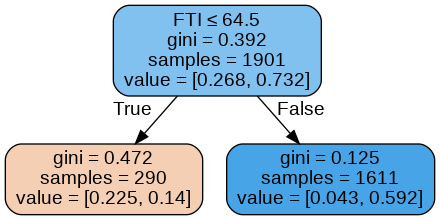

In [74]:
#Printing out the 21st stump
dot_data = StringIO()

tree = ada_boost.estimators_[21]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The 21st stump shows that the decision between if an individual had FTI levels less or equal to 64.5. The True showed it had a relatively high information gain with a gini value of 0.472.

In [82]:
#Printing out the most important features in the ada boost model.
important_feat = pd.DataFrame({'feature': X.columns, 'importance': ada_boost.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

,importance
feature,
TSH,0.580645
FTI,0.419355
age,0.000000
lithium,0.000000
TBG,0.000000
T4U,0.000000
TT4,0.000000
T3,0.000000
goitre,0.000000


According to AdaBoostClassifier only two features were important in the prediction of whether one has hypotroidism or not. These are the:


*   TSH Levels
*   FTI Levels

This agrees with the Random Forest as the two most important features in prediction. 

I will be using the two features for my analysis and visualization in the Support Vector Machine models.

Key take aways for the baseline models built:



*   Logistic Model       :       Has a RMSE score of 0.131 
*   Decision Tree model  :       Has a RMSE score : 0.099

The decision tree model performed better in comparison to the Logistic Model. Therefore we will use it as our main baseline model.

I also did the random forests model and the ada boosted algorithms which perfromed well for both. Below is the analysis:

*   Random Forest   : Accuracy: 99.02% ; RMSE : 0.099 

For the tuned model of the Random Forest the accuracy was at 99.02% and the RMSE was at 0.099.

*  Ada boost   :   Accuracy: 99.02% ; RMSE : 0.099

For the tuned model of the Ada Boost Algorithm the accuracy was at 98.89 and the RMSE WAS AT 0.011

I would prefer the Ada Boost tuned model since it had the lowest RMSE of all the models. Though it had a lower accuracy which means it did better in reducing overfitting. 

So the tuned Ada Boost Algorithm it is!!


# Support Vector Machines

Support Vector Machine is a supervised machine learning algorithm which can be used for both classification or regression challenges. However its mostly used in classification problems. 
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes that we can easily put the new data point in the correct category in the future.

The Support Vector Machine can be of two types which are:


*   Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier. This is the linear kernel.
*   Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.This is the polynomial and radial basis function kernel.



**Linear Kernel**

This falls in the category of the linear SVMs.

I decided to use the two most important features for the Random Forest and the Ada Boost which are the :


*   TSH levels
*   FTI levels

as my independent variables for my SVM models.

In [30]:
X = df[['TSH','FTI']]
y = df['status']

# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
#Fitting my data in a linear SVM model
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
#Predicting the values using the test data
y_predict = model.predict(X_test)

In [33]:
#Printing out the accuracy of the model to use it as a metric for perfromance
from sklearn import metrics
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('RMSE is:', metrics.mean_squared_error(y_test,y_predict))

Accuracy 0.9728395061728395
RMSE is: 0.027160493827160494


The accuaracy of our linear kernel is at 97.2% while the RMSE of our SVM linear kernel is at 0.027. Our linear kernel has generally perfromed well.

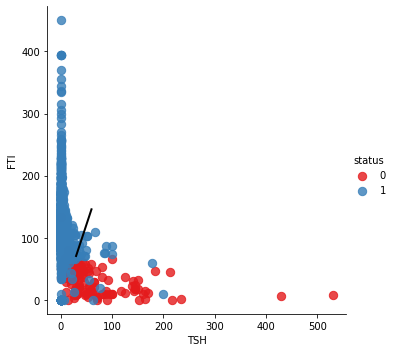

In [36]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the hyperplane
sns.lmplot('TSH', 'FTI', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');


The line did not quite clearly demarcate between the two classess.

**Hyper-parameter tuning for the linear kernel**

In [17]:
#Checking the parameters to tune in the Support Vector Machine models.
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
#Defining the hyperparameters that we will Random Search
params = {'C': np.arange(1, 50, 5),
         'gamma': np.linspace(2**-5, 2**5, 10)}

In [19]:
#Fitting the hyperparameters in the Random Search with 3 cross validation models with 50 iterations.
from sklearn.model_selection import RandomizedSearchCV
svm = SVC(kernel='linear')
svc_random = RandomizedSearchCV(estimator=svm,param_distributions=params,n_iter=50,cv=3,verbose=2,random_state=0,n_jobs=-1) 

In [20]:
#Fitting and searching for best parameters for our model
svc_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='linear', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                                        'gamma': array([3.12500000e-02, 3.58333333e+00, 7.13541667e+00, 1.06875000e+01,
       1.42395833e+01, 1.77916667e+01, 2.13437500e+01, 2.48958333e+01,
       2.84479167e+01, 3.20000000e+01])},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbo

In [21]:
#Printing out the best parameters
svc_random.best_params_

{'C': 11, 'gamma': 21.34375}

The best parameters for the SVM linear kernel is:


*   C at 11
*   Gamma at 21.34375



In [22]:
#Defining the model's hyperparameters
model = SVC(kernel='linear',C = 11, gamma = 21.34375)

In [23]:
#Fitting the model into our data
model.fit(X_train,y_train)

SVC(C=11, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=21.34375, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
#Predicting using the test set
y_pred = model.predict(X_test)

In [25]:
#Printing out the RMSE scores and the accuracy score as a metric for assessing the perfromance of the model.
print('Accuracy ', metrics.accuracy_score(y_test,y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy  0.9728395061728395
RMSE is: 0.16480441082434807


The tuned model had an accuracy of 97% and a RMSE of 0.1648. There was a drop in the RMSE levels which means our tuned model performed better than its untuned counterpart and am excited to find out how the other kernels will perform.

**Polynomial Kernel**

This falls under the non linear SVM kernels. I will also be using the TSH and FTI variables in my Polynomial kernel SVM Model. 

In [11]:
X = df[['TSH','FTI']]
y = df['status']

# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


In [12]:
#Fitting the data in a polynomial SVM model
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='poly')
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
#Predicting the values using the test data
y_predict = model.predict(X_test)

In [18]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Printing out the accuracy as a metric to assess the performance of the model.
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('RMSE is :', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy 0.9604938271604938
RMSE is : 0.1987615979999813


Our polynomial model has an accuracy of 96% and a RMSE score of 0.1988. The model performed poorly than the linear kernel

**Hyperparameter tuning**

In [15]:
#Defining the hyperparameters that we will Random Search
params = {'C': np.arange(1, 50, 5),
         'gamma': np.linspace(2**-5, 2**5, 10)}

In [16]:
#Fitting the hyperparameters in the RandomizedSearch.
from sklearn.model_selection import RandomizedSearchCV
svm = SVC(kernel='poly')
svc_random = RandomizedSearchCV(estimator=svm,param_distributions=params,n_iter=50,cv=3,verbose=2,random_state=0,n_jobs=-1)

In [17]:
svc_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

The fitting of the data in the Random Search and looking for the best parameters proved unsuccsesful with over an hour in wait. This means the computational resource proved quite expensive.

In [ ]:
#Fitting the data in a polynomial SVM model
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='poly',C = 11, gamma=15)
model.fit(X_train,y_train)

In [ ]:
#Predicting the values using the test data
y_predict = model.predict(X_test)

In [ ]:
#Printing out the accuracy as a metric to assess the performance of the model.
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('RMSE is :', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Rbf method

In [ ]:
X = df[['TSH','FTI']]
y = df['status']

# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [17]:
#Fitting my data in a radial basis function
from sklearn.svm import SVC,LinearSVC

model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
#Predicting the values using the test data
y_predict = model.predict(X_test)

In [19]:
#Printing the accuracy of the model as a metric for assesing my model.
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy 0.9799789251844047
RMSE is: 0.14149584734399578


Hyperparameter tuning

In [20]:
params = {'C': np.arange(1, 50, 5),
         'gamma': np.linspace(2**-5, 2**5, 10)}

In [21]:
from sklearn.model_selection import RandomizedSearchCV
svm = SVC(kernel='poly')
svc_random = RandomizedSearchCV(estimator=svm,param_distributions=params,n_iter=50,cv=3,verbose=2,random_state=0,n_jobs=-1)

In [22]:
svc_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

This also happened with the rbf kernel where the search for the best hyperparameters of the kernel proved quite computationally expensive.

As required, I was expected to use all the features in the model that perfroms best which was my linear kernel model. I used all features in this model done below. The best parameters for the linear kernel was C at 11 and the gamma at 21.34375.

In [12]:
#Defining the predictor variables and the target variable.
X = df.drop(['status'],axis=1)
y = df['status']
from sklearn.svm import SVC,LinearSVC
# splitting the data into train and test sets
# import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#Defining the model's hyperparameters
model = SVC(kernel='linear',C = 11, gamma = 21.34375)

In [14]:
#Fitting the model in our tuned model
model.fit(X_train,y_train)

SVC(C=11, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=21.34375, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
#Predicting the values using our test set
y_pred = model.predict(X_test)

In [19]:
#Pinting the accuracy and the RMSE as our metric for assessing my model.
print('Accuracy ', metrics.accuracy_score(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy  0.9839506172839506
RMSE:  0.12668615834434868


Using all features the RMSE of the linear kernel which was our best perfroming model increased significantly from 0.018 to 0.1266. Though the accuracy rose from 98.16% to 98.39%. Using two features is actually better in prediction than all features in prediction.

# Challenging the solution

From all the models that I created the tuned Ada Boost model perfromed best. It had the lowest RMSE score and a high accuracy score. 

According to the Ada Boost Algorithm the following factors affect more to the predisposition of an individual to hypothroidism:

*   TSH levels; Thyroid Stimualating Hormone
*   FTI levels; Free Thyroxine Index
*   The age of the individual
*   The lithium levels
*   TBG levels; Thyroxine Binding Globulin

The tuned Ada Boost Algorithm had an accuracy of 98% and a RMSE of 0.011. In the SVM models, the linear kernel perfromed best with an accuarcy of 98% and a RMSE of 0.018.  


I will be challenging my solution with the XGBoost Algorithm which is focused on computational speed and model perfromance which proved quite troublsome where the computational power was really expensive.

There are three main forms of gradient boosting which are supported:-


*   Gradient Boosting Algorithm also called the gradient boosting machine.
*   Stochastic Gradient Boosting with sub-sampling at the column per split level.
*   Regularized Gradient Boosting with L1 and L2 regularization.



In [23]:
#importing xgboost
import xgboost as xgb
#Defining the regression of our classifer to linear
xgb_model = xgb.XGBClassifier(objective='reg:linear',random_state=42)

In [24]:
#Training our data
X = df.drop(['status'],axis=1)
y = df['status']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

xgb_model.fit(X_train,y_train)

[21:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
#Predict the data using the test set
y_predict = xgb_model.predict(X_test)
#Getting the metrics for my assessments of my model
print('Accuracy', metrics.accuracy_score(y_test,y_predict))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy 0.9915700737618546
RMSE is 0.09181462976097772


The XGBoost did quite a good job with very minimal computational power. The accuracy was at 99% and had a really low RMSE at 0.09. This model can also be used for the cases where the computational resource proved tough.

# Challenges

The plotting of my support vector machine models proved quite trouble some because of my crashing session as I try to do that. 
This was also experienced in hyper parameter tuning of the SVM models. Despite upgrading my hardware accelerator from GPU to the TPU levels. This challenged me to perform the varous visualizations and the hyper parameter tuning thus didn't quite have all the models for comparison. 

Over and above, I was able to challenge my solution and came up with the XGBoost which is focuses on computational speed and model perfromance and did quite a splendid job therefore I had a solution for my computational challenge!